In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [38]:
df = pd.read_csv("carData.csv")
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [39]:
df.info()
df.drop(["Make","Model","Engine Fuel Type","Transmission Type","Driven_Wheels","Market Category","Vehicle Size","Vehicle Style"],axis=1 , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [40]:
df.isnull().sum()

Year                 0
Engine HP           69
Engine Cylinders    30
Number of Doors      6
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [41]:
df.fillna(df.mean(),inplace=True)

In [42]:
df.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

In [43]:
df.fillna(0,inplace=True)

In [44]:
df.isnull().sum()

Year                0
Engine HP           0
Engine Cylinders    0
Number of Doors     0
highway MPG         0
city mpg            0
Popularity          0
MSRP                0
dtype: int64

<Axes: xlabel='MSRP', ylabel='Count'>

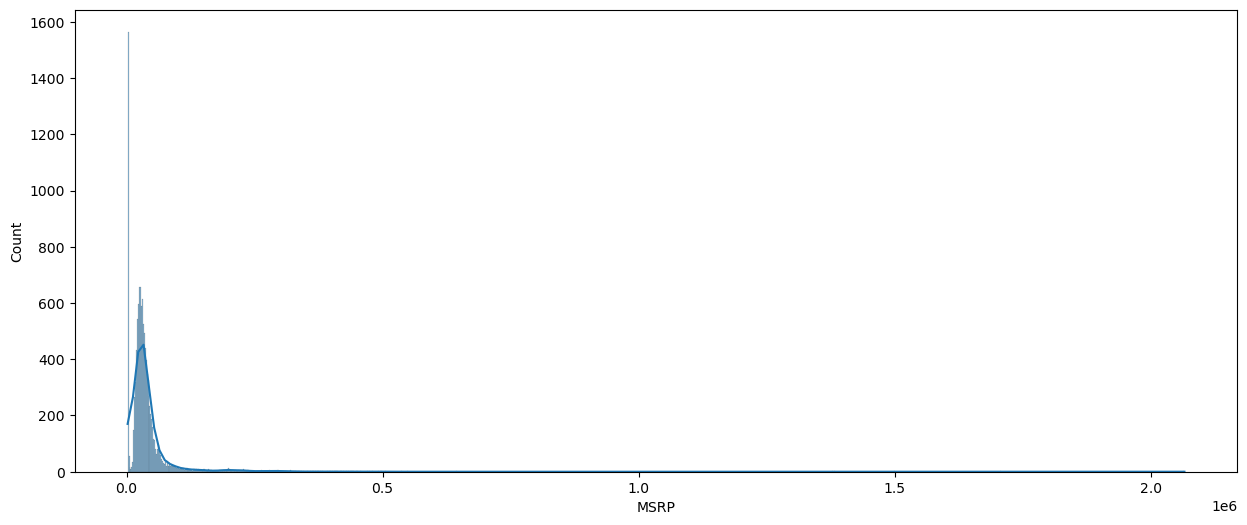

In [45]:
plt.figure(figsize=(15,6))
sns.histplot(df["MSRP"],kde=True)

<Axes: xlabel='MSRP', ylabel='Count'>

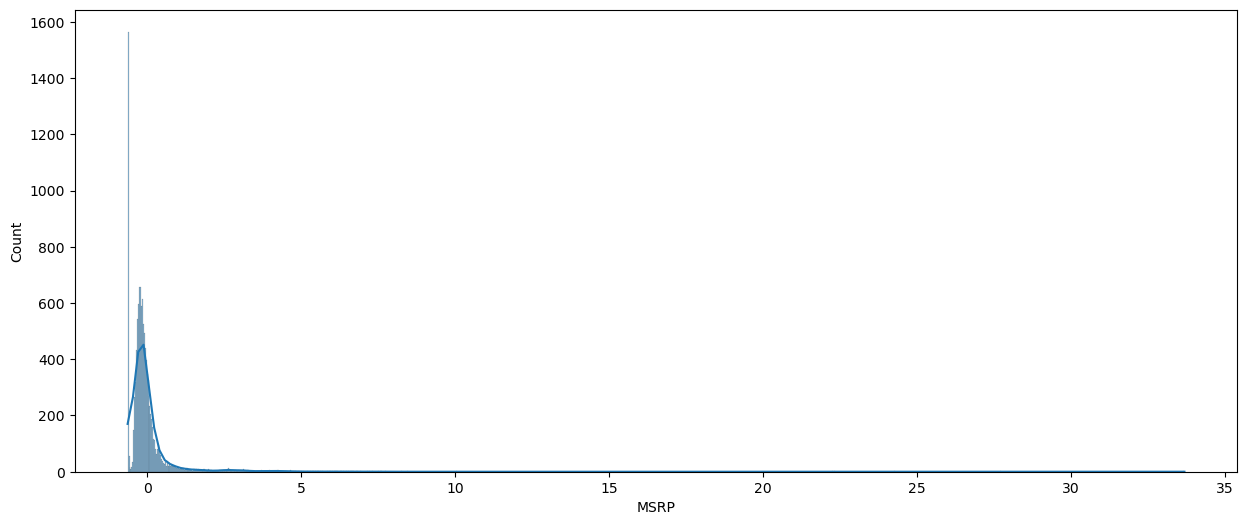

In [46]:
scaler = StandardScaler()
df =pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
plt.figure(figsize=(15,6))
sns.histplot(df["MSRP"],kde=True)

In [47]:
def fit_model(x, b):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    y_hat = x.dot(b)
    return y_hat


def find_betas(x, y, lamda):
    n = len(x)
    x_bias = np.ones((n, 1))
    I = np.identity(x.shape[1])
    x = np.c_[x_bias, x]
    betas = np.linalg.inv(x.T.dot(x) + lamda * I).dot(x.T).dot(y)
    return betas


def predict(x, betas):
    n = len(x)
    x_bias = np.ones((n, 1))
    x = np.c_[x_bias, x]
    prediction = x.dot(betas)
    return prediction


def square_error(y, y_hat):
    error = y - y_hat
    square = error.T.dot(error)
    return square

<Axes: xlabel='MSRP', ylabel='Count'>

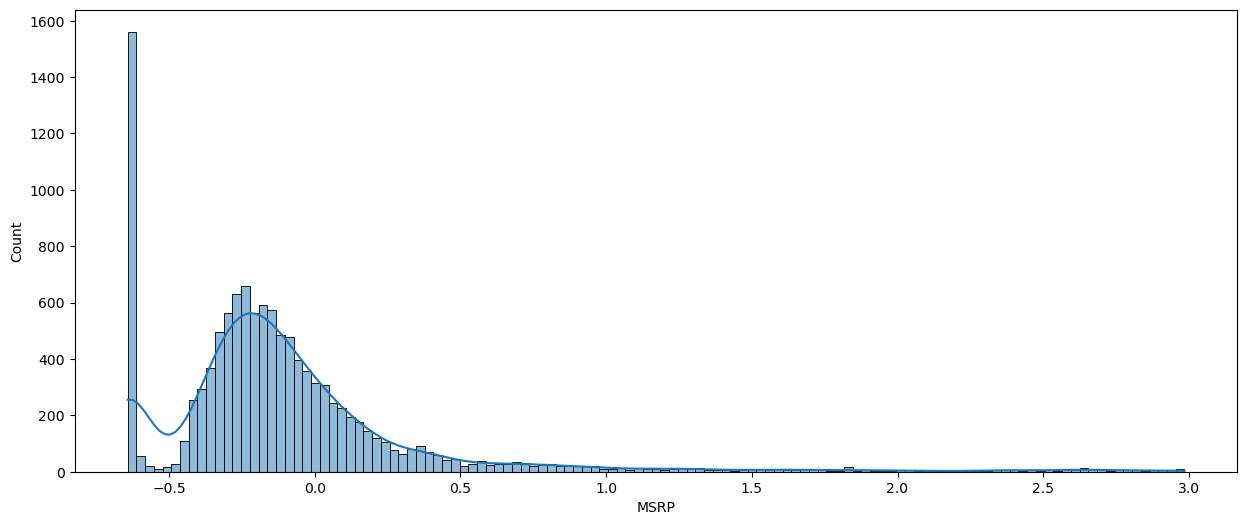

In [48]:
df = df[abs(df["MSRP"])<3]
plt.figure(figsize=(15,6))
sns.histplot(df["MSRP"],kde=True)

In [51]:
x = df.drop(["MSRP"], axis=1)
y = df["MSRP"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
model = Ridge()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.6575283463291848
0.6500246999364513
